In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
from IPython.display import Markdown, display
import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
np.random.seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
acc_df = pd.read_csv('/content/drive/My Drive/Journal/Data/Accident_journal.csv')
crime_df = pd.read_csv('/content/drive/My Drive/Journal/Data/Crime_journal.csv')
# crime_df = pd.read_csv('/content/drive/My Drive/ColabNotebooks/dataset/Last/Crime(last).csv')

ent_df = pd.read_csv('/content/drive/My Drive/Journal/Data/Entertainment_journal.csv')
sports_df = pd.read_csv('/content/drive/My Drive/Journal/Data/Sports_journal.csv')

In [ ]:
acc_df.head()

In [ ]:
crime_df.head()

In [ ]:
ent_df.head()

In [ ]:
sports_df.head()

,ID,Title,Description,Label
0,1,বিশ্ব আর্চারির বর্ষসেরা তালিকায় বাংলাদেশের রো...,সালটা দুর্দান্ত কেটেছে বাংলাদেশের সেরা আর্চার...,athletics
1,2,ল্যান্সনায়েক রোমান সানা,তীরধনুক হাতে ক্রীড়াঅঙ্গনে দেশকে সাফল্য এনে রোম...,athletics
2,3,এসএ গেমসে আরো স্বর্ণপদক,নেপালে এসএ গেমসে রোববার দিনভর সাফল্যের সোমবারও...,athletics
3,4,আর্চারিতে –এ বাংলাদেশ,এসএ গেমসের আর্চারিতে অনন্য নজির গড়েছেন বাংলাদে...,athletics
4,5,আর্চারিতে স্বর্ণ পদক জিতেছেন সুমা,এসএ গেমসে আর্চারিতে মেয়েদের কম্পাউন্ড এককে শ্র...,athletics


In [ ]:
print("Accident", acc_df.shape)
print("Crime", crime_df.shape)
print("Entertainment", ent_df.shape)
print("Sport", sports_df.shape)

Accident (11847, 4)
Crime (13902, 4)
Entertainment (17517, 4)
Sport (39000, 4)


## Find Duplicates

In [ ]:
duplicate_acc_df = pd.DataFrame(acc_df[acc_df.duplicated(['Description', 'Label'])])
print(acc_df.duplicated(['Description']).sum())
print(acc_df.duplicated(['Description', 'Label']).sum())

60
37


In [ ]:
duplicate_crime_df = pd.DataFrame(crime_df[crime_df.duplicated(['Description', 'Label'])])
print(crime_df.duplicated(['Description']).sum())
print(crime_df.duplicated(['Description', 'Label']).sum())
# duplicate_crime_df

136
71


In [ ]:
duplicate_ent_df = pd.DataFrame(ent_df[ent_df.duplicated(['Description', 'Label'])])
print(ent_df.duplicated(['Description']).sum())
print(ent_df.duplicated(['Description', 'Label']).sum())

872
796


In [ ]:
duplicate_sports_df = pd.DataFrame(sports_df[sports_df.duplicated(['Description', 'Label'])])
print(sports_df.duplicated(['Description']).sum())
print(sports_df.duplicated(['Description', 'Label']).sum())

757
724


## Remove Duplicates within same subcategory

In [ ]:
acc = acc_df.drop_duplicates(subset = ['Description', 'Label'], keep  = 'first', inplace = False)
print(acc.duplicated(['Description']).sum())
print(acc.duplicated(['Description', 'Label']).sum())
print(acc.shape)

23
0
(11810, 4)


In [ ]:
crime = crime_df.drop_duplicates(subset = ['Description', 'Label'], keep  = 'first', inplace = False)
print(crime.duplicated(['Description']).sum())
print(crime.duplicated(['Description', 'Label']).sum())

65
0


In [ ]:
ent = ent_df.drop_duplicates(subset = ['Description', 'Label'], keep  = 'first', inplace = False)
print(ent.duplicated(['Description']).sum())
print(ent.duplicated(['Description', 'Label']).sum())

76
0


In [ ]:
sports = sports_df.drop_duplicates(subset = ['Description', 'Label'], keep  = 'first', inplace = False)
print(sports.duplicated(['Description']).sum())
print(sports.duplicated(['Description', 'Label']).sum())

33
0


## Visualize and count data in each Subcategory

In [ ]:
def bar_plot(variable, df):
    """
        input: variable ex: "Label"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

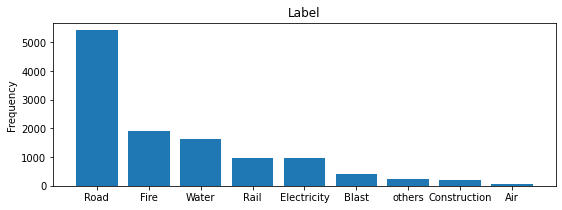

Label: 
 Road            5413
Fire            1915
Water           1642
Rail             973
Electricity      954
Blast            426
others           242
Construction     193
Air               52
Name: Label, dtype: int64


In [ ]:
bar_plot("Label", acc)

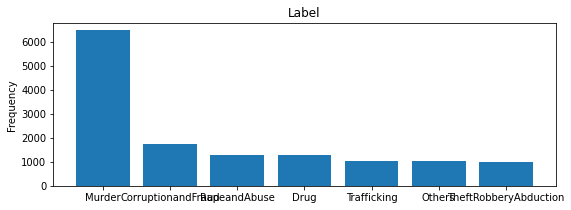

Label: 
 Murder                   6465
CorruptionandFraud       1749
RapeandAbuse             1271
Drug                     1264
Trafficking              1050
Others                   1036
TheftRobberyAbduction     996
Name: Label, dtype: int64


In [ ]:
bar_plot("Label", crime)

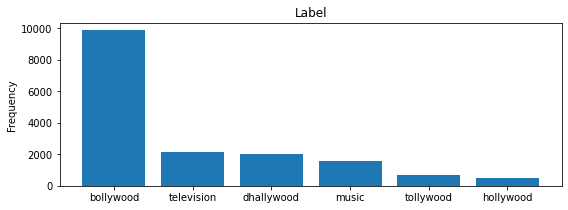

Label: 
 bollywood     9864
television    2134
dhallywood    2036
music         1547
tollywood      670
hollywood      470
Name: Label, dtype: int64


In [ ]:
bar_plot("Label", ent)

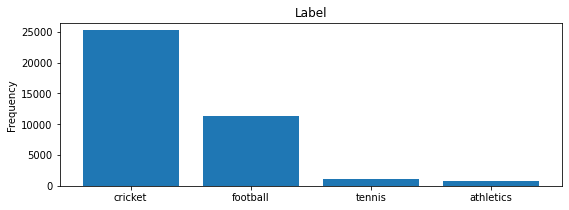

Label: 
 cricket      25218
football     11270
tennis        1073
athletics      715
Name: Label, dtype: int64


In [ ]:
bar_plot("Label", sports)

## Find Length of each article

In [ ]:
acc['Length'] = acc['Description'].apply(lambda x: len(str(x)))
acc.head()

,ID,Title,Description,Label,Length
0,1,পাখির আঘাতে ড্যাশ উড়োজাহাজের জরুরি অবতরণ,বিমান বাংলাদেশ এয়ারলাইনসের ড্যাশ মডেলের উড়োজাহ...,Air,2438
1,2,চট্টগ্রামে বিমানে যান্ত্রিক ত্রুটি জরুরি অবতরণ,আকাশে ওড়ার মিনিট চট্টগ্রাম শাহ আমানত আন্তর্জ...,Air,839
2,3,বিমানের ড্যাশ এইটের জরুরি অবতরণ,হজরত শাহজালাল আন্তর্জাতিক বিমানবন্দরে বিমান বা...,Air,2180
3,4,উড়োজাহাজেই মৃত্যু ওমানপ্রবাসীর ঘটেছি ফ্লাইটে,স্বপ্ন বিদেশে গিয়েছিলেন ওমান প্রবাসী রানা আহমে...,Air,3249
4,5,অভ্র করবেন,ইয়াঙ্গুন আন্তর্জাতিক বিমানবন্দরে মে সন্ধ্যায় ...,Air,3527


In [ ]:
crime['Length'] = crime['Description'].apply(lambda x: len(str(x)))
crime.head()

,ID,Title,Description,Label,Length
0,1,স্যালাইন স্ট্যান্ডের দাম টাকা,উন্নয়ন প্রকল্প প্রস্তাবনাতেই দুর্নীতির ভূত সাম...,CorruptionandFraud,5362
1,2,তজুমদ্দিনে নিষেধাজ্ঞা অনাম্য জেলেকে জেলজরিমানা,ভোলার তজুমদ্দিনের মেঘনায় নিষেধাজ্ঞা অমান্য মাছ...,CorruptionandFraud,829
2,3,পিজিসিবির তিন কর্মকর্তার বিরুদ্ধে দুদকের মামলা,পিরোজপুরের ভান্ডারিয়া উপজেলায় বিদ্যুৎ বিভাগের ...,CorruptionandFraud,1966
3,4,কালকিনিতে মেয়রের অবৈধ স্থাপনা গুড়িয়ে দিলো প্র...,মাদারীপুরের কালকিনিতে সরকারী জায়গায় মেয়রের ব্য...,CorruptionandFraud,804
4,5,মতলব উত্তরে জাটকা ধরায় জেলের কারাদণ্ড,চাঁদপুরের মতলব উপজেলার মেঘনা নদীতে নিষেধাজ্ঞা ...,CorruptionandFraud,784


In [ ]:
ent['Length'] = ent['Description'].apply(lambda x: len(str(x)))
ent.head()

,ID,Title,Description,Label,Length
0,1,সাবেক প্রেমিককে টেনে নিলেন জাহ্নবী,বলিউডের কিংবদন্তি চিত্রনায়িকা প্রয়াত শ্রীদেবী ...,bollywood,723
1,2,করোনায় নারীকে উপহার প্রিয়াঙ্কা,করোনার মহামারীর নিঃস্বার্থভাবে বিশ্বের প্রান্ত...,bollywood,806
2,3,পোস্টের টাকা,অভিনয় বলুন সৌন্দর্য একজন অন্যজনকে পেরিয়ে সামনে...,bollywood,608
3,4,ক্যাটরিনাকে বিয়ে অমিতাভ,বলিউডের অন্যতম ব্যাচেলর অভিনেত্রীর অন্যতম ক্যা...,bollywood,660
4,5,মা হলেন ডিম্পি,মা হলেন রাহুল মহাজনের প্রাক্তন স্ত্রী ডিম্পি গ...,bollywood,652


In [ ]:
sports['Length'] = sports['Description'].apply(lambda x: len(str(x)))
sports.head()

,ID,Title,Description,Label,Length
0,1,বিশ্ব আর্চারির বর্ষসেরা তালিকায় বাংলাদেশের রো...,সালটা দুর্দান্ত কেটেছে বাংলাদেশের সেরা আর্চার...,athletics,946
1,2,ল্যান্সনায়েক রোমান সানা,তীরধনুক হাতে ক্রীড়াঅঙ্গনে দেশকে সাফল্য এনে রোম...,athletics,727
2,3,এসএ গেমসে আরো স্বর্ণপদক,নেপালে এসএ গেমসে রোববার দিনভর সাফল্যের সোমবারও...,athletics,463
3,4,আর্চারিতে –এ বাংলাদেশ,এসএ গেমসের আর্চারিতে অনন্য নজির গড়েছেন বাংলাদে...,athletics,1978
4,5,আর্চারিতে স্বর্ণ পদক জিতেছেন সুমা,এসএ গেমসে আর্চারিতে মেয়েদের কম্পাউন্ড এককে শ্র...,athletics,802


## Remove stopwords

In [ ]:
stopwords =list(open('/content/drive/My Drive/Journal/Stopwords.txt', mode='r', encoding='UTF-8'))

#  f = open('the-zen-of-python.txt','r')

In [ ]:
stopwords

['অই\n',
 'অগত্যা\n',
 'অত: পর\n',
 'অতএব\n',
 'অথচ\n',
 'অথবা\n',
 'অধিক\n',
 'অধীনে\n',
 'অধ্যায়\n',
 'অনুগ্রহ\n',
 'অনুভূত\n',
 'অনুযায়ী\n',
 'অনুরূপ\n',
 'অনুসন্ধান\n',
 'অনুসরণ\n',
 'অনুসারে\n',
 'অনুসৃত\n',
 'অনেক\n',
 'অনেকে\n',
 'অনেকেই\n',
 'অন্তত\n',
 'অন্য\n',
 'অন্যত্র\n',
 'অন্যভাবে\n',
 'অন্যান্য\n',
 'অপেক্ষাকৃতভাবে\n',
 'অবধি\n',
 'অবশ্য\n',
 'অবশ্যই\n',
 'অবস্থা\n',
 'অবিলম্বে\n',
 'অভ্যন্তরস্থ\n',
 'অর্জিত\n',
 'অর্থাত\n',
 'অসদৃশ\n',
 'অসম্ভাব্য\n',
 'আইন\n',
 'আউট\n',
 'আক্রান্ত\n',
 'আগামী\n',
 'আগে\n',
 'আগেই\n',
 'আগ্রহী\n',
 'আছে\n',
 'আজ\n',
 'আট\n',
 'আদেশ\n',
 'আদ্যভাগে\n',
 'আন্দাজ\n',
 'আপনার\n',
 'আপনি\n',
 'আবার\n',
 'আমরা\n',
 'আমাকে\n',
 'আমাদিগের\n',
 'আমাদের\n',
 'আমার\n',
 'আমি\n',
 'আর\n',
 'আরও\n',
 'আশি\n',
 'আশু\n',
 'আসা\n',
 'আসে\n',
 'ই\n',
 'ইচ্ছা\n',
 'ইচ্ছাপূর্বক\n',
 'ইতিমধ্যে\n',
 'ইতোমধ্যে\n',
 'ইত্যাদি\n',
 'ইশারা\n',
 'ইহা\n',
 'ইহাতে\n',
 'উক্তি\n',
 'উচিত\n',
 'উচ্চ\n',
 'উঠা\n',
 'উত্তম\n',
 'উত্তর\n',
 'উনি\n',
 'উপর\n',
 'উপরে\n'

In [ ]:
from nltk import word_tokenize

import nltk
nltk.download('punkt')

def remove_stopwords(text):
    removed = []
    stop_words = stopwords
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
acc['Description'] = acc['Description'].apply(lambda x: remove_stopwords(str(x)))
acc['Title'] = acc['Title'].apply(lambda x: remove_stopwords(str(x)))
acc['New_length'] = acc['Description'].apply(lambda x: len(str(x)))
acc = acc.astype({'New_length': np.int})
acc.head()

,ID,Title,Description,Label,Length,New_length
0,1,পাখির আঘাতে ড্যাশ উড়োজাহাজের জরুরি অবতরণ,বিমান বাংলাদেশ এয়ারলাইনসের ড্যাশ মডেলের উড়োজাহ...,Air,2438,2423
1,2,চট্টগ্রামে বিমানে যান্ত্রিক ত্রুটি জরুরি অবতরণ,আকাশে ওড়ার মিনিট চট্টগ্রাম শাহ আমানত আন্তর্জা...,Air,839,831
2,3,বিমানের ড্যাশ এইটের জরুরি অবতরণ,হজরত শাহজালাল আন্তর্জাতিক বিমানবন্দরে বিমান বা...,Air,2180,2167
3,4,উড়োজাহাজেই মৃত্যু ওমানপ্রবাসীর ঘটেছি ফ্লাইটে,স্বপ্ন বিদেশে গিয়েছিলেন ওমান প্রবাসী রানা আহমে...,Air,3249,3228
4,5,অভ্র করবেন,ইয়াঙ্গুন আন্তর্জাতিক বিমানবন্দরে মে সন্ধ্যায় র...,Air,3527,3488


In [ ]:
crime['Description'] = crime['Description'].apply(lambda x: remove_stopwords(str(x)))
crime['Title'] = crime['Title'].apply(lambda x: remove_stopwords(str(x)))
crime['New_length'] = crime['Description'].apply(lambda x: len(str(x)))
crime = crime.astype({'New_length': np.int})
crime.head()

,ID,Title,Description,Label,Length,New_length
0,1,স্যালাইন স্ট্যান্ডের দাম টাকা,উন্নয়ন প্রকল্প প্রস্তাবনাতেই দুর্নীতির ভূত সাম...,CorruptionandFraud,5362,5329
1,2,তজুমদ্দিনে নিষেধাজ্ঞা অনাম্য জেলেকে জেলজরিমানা,ভোলার তজুমদ্দিনের মেঘনায় নিষেধাজ্ঞা অমান্য মাছ...,CorruptionandFraud,829,803
2,3,পিজিসিবির তিন কর্মকর্তার বিরুদ্ধে দুদকের মামলা,পিরোজপুরের ভান্ডারিয়া উপজেলায় বিদ্যুৎ বিভাগের ...,CorruptionandFraud,1966,1954
3,4,কালকিনিতে মেয়রের অবৈধ স্থাপনা গুড়িয়ে দিলো প্রশাসন,মাদারীপুরের কালকিনিতে সরকারী জায়গায় মেয়রের ব্য...,CorruptionandFraud,804,797
4,5,মতলব উত্তরে জাটকা ধরায় জেলের কারাদণ্ড,চাঁদপুরের মতলব উপজেলার মেঘনা নদীতে নিষেধাজ্ঞা ...,CorruptionandFraud,784,765


In [ ]:
ent['Description'] = ent['Description'].apply(lambda x: remove_stopwords(str(x)))
ent['Title'] = ent['Title'].apply(lambda x: remove_stopwords(str(x)))
ent['New_length'] = ent['Description'].apply(lambda x: len(str(x)))
ent = ent.astype({'New_length': np.int})
ent.head()

,ID,Title,Description,Label,Length,New_length
0,1,সাবেক প্রেমিককে টেনে নিলেন জাহ্নবী,বলিউডের কিংবদন্তি চিত্রনায়িকা প্রয়াত শ্রীদেবী ...,bollywood,723,723
1,2,করোনায় নারীকে উপহার প্রিয়াঙ্কা,করোনার মহামারীর নিঃস্বার্থভাবে বিশ্বের প্রান্ত...,bollywood,806,796
2,3,পোস্টের টাকা,অভিনয় বলুন সৌন্দর্য একজন অন্যজনকে পেরিয়ে সামনে...,bollywood,608,601
3,4,ক্যাটরিনাকে বিয়ে অমিতাভ,বলিউডের অন্যতম ব্যাচেলর অভিনেত্রীর অন্যতম ক্যা...,bollywood,660,659
4,5,মা হলেন ডিম্পি,মা হলেন রাহুল মহাজনের প্রাক্তন স্ত্রী ডিম্পি গ...,bollywood,652,638


In [ ]:
sports['Description'] = sports['Description'].apply(lambda x: remove_stopwords(str(x)))
sports['Title'] = sports['Title'].apply(lambda x: remove_stopwords(str(x)))
sports['New_length'] = sports['Description'].apply(lambda x: len(str(x)))
sports = sports.astype({'New_length': np.int})
sports.head()

,ID,Title,Description,Label,Length,New_length
0,1,বিশ্ব আর্চারির বর্ষসেরা তালিকায় বাংলাদেশের রোম...,সালটা দুর্দান্ত কেটেছে বাংলাদেশের সেরা আর্চার ...,athletics,946,941
1,2,ল্যান্সনায়েক রোমান সানা,তীরধনুক হাতে ক্রীড়াঅঙ্গনে দেশকে সাফল্য এনে রোম...,athletics,727,719
2,3,এসএ গেমসে আরো স্বর্ণপদক,নেপালে এসএ গেমসে রোববার দিনভর সাফল্যের সোমবারও...,athletics,463,460
3,4,আর্চারিতে –এ বাংলাদেশ,এসএ গেমসের আর্চারিতে অনন্য নজির গড়েছেন বাংলাদে...,athletics,1978,1965
4,5,আর্চারিতে স্বর্ণ পদক জিতেছেন সুমা,এসএ গেমসে আর্চারিতে মেয়েদের কম্পাউন্ড এককে শ্র...,athletics,802,795


## Label Encoding

In [ ]:
le = LabelEncoder()
def label_encoder(df):

    df["Label"] = le.fit_transform(df["Label"].astype(str))
    label_map = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_map)


    df["Label"] = le.fit_transform(df["Label"].astype(str))
    label_map = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_map)

In [ ]:
label_encoder(acc)

{'Air': 0, 'Blast': 1, 'Construction': 2, 'Electricity': 3, 'Fire': 4, 'Rail': 5, 'Road': 6, 'Water': 7, 'others': 8}
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8}


In [ ]:
label_encoder(crime)

{'CorruptionandFraud': 0, 'Drug': 1, 'Murder': 2, 'Others': 3, 'RapeandAbuse': 4, 'TheftRobberyAbduction': 5, 'Trafficking': 6}
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}


In [ ]:
label_encoder(ent)

{'bollywood': 0, 'dhallywood': 1, 'hollywood': 2, 'music': 3, 'television': 4, 'tollywood': 5}
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


In [ ]:
label_encoder(sports)

{'athletics': 0, 'cricket': 1, 'football': 2, 'tennis': 3}
{'0': 0, '1': 1, '2': 2, '3': 3}


## Split Train/Test set

In [ ]:
accY = acc["Label"]
accX = acc.drop("Label", axis=1)

crimeY = crime["Label"]
crimeX = crime.drop("Label", axis=1)

entY = ent["Label"]
entX = ent.drop("Label", axis=1)

sportsY = sports["Label"]
sportsX = sports.drop("Label", axis=1)

In [ ]:
accX_train, accX_test, accy_train, accy_test = train_test_split(accX, accY, test_size = 0.1, random_state = 5 , stratify=accY)

In [ ]:
crimeX_train, crimeX_test, crimey_train, crimey_test = train_test_split(crimeX, crimeY, test_size = 0.1, random_state = 4,  stratify=crimeY)

In [ ]:
entX_train, entX_test, enty_train, enty_test = train_test_split(entX, entY, test_size = 0.1, random_state = 5, stratify=entY)

In [ ]:
sportsX_train, sportsX_test, sportsy_train, sportsy_test = train_test_split(sportsX, sportsY, test_size = 0.1, random_state = 5, stratify=sportsY)

## Train/Val

In [ ]:
accX_train, accX_val, accy_train, accy_val = train_test_split(accX_train, accy_train, test_size = 0.1, random_state = 5, stratify=accy_train)

In [ ]:
crimeX_train, crimeX_val, crimey_train, crimey_val = train_test_split(crimeX_train, crimey_train, test_size = 0.1, random_state = 4, stratify=crimey_train)

In [ ]:
entX_train, entX_val, enty_train, enty_val = train_test_split(entX_train, enty_train, test_size = 0.1, random_state = 5, stratify=enty_train)

In [ ]:
sportsX_train, sportsX_val, sportsy_train, sportsy_val = train_test_split(sportsX_train, sportsy_train, test_size = 0.1, random_state = 5, stratify=sportsy_train)

In [ ]:
print("Train set has {} data".format(len(accX_train)))
print("Validation set has {} data".format(len(accX_val)))
print("Test set has {} data".format(len(accX_test)))

Train set has 9566 data
Validation set has 1063 data
Test set has 1181 data


In [ ]:
print("Train set has {} data".format(len(crimeX_train)))
print("Validation set has {} data".format(len(crimeX_val)))
print("Test set has {} data".format(len(crimeX_test)))

Train set has 11202 data
Validation set has 1245 data
Test set has 1384 data


In [ ]:
print("Train set has {} data".format(len(entX_train)))
print("Validation set has {} data".format(len(entX_val)))
print("Test set has {} data".format(len(entX_test)))

Train set has 13543 data
Validation set has 1505 data
Test set has 1673 data


In [ ]:
print("Train set has {} data".format(len(sportsX_train)))
print("Validation set has {} data".format(len(sportsX_val)))
print("Test set has {} data".format(len(sportsX_test)))

Train set has 31003 data
Validation set has 3445 data
Test set has 3828 data


In [ ]:
accy_train.value_counts()

6    4385
4    1551
7    1330
5     788
3     772
1     345
8     196
2     157
0      42
Name: Label, dtype: int64

In [ ]:
accy_val.value_counts()

6    487
4    172
7    148
5     88
3     86
1     38
8     22
2     17
0      5
Name: Label, dtype: int64

In [ ]:
accy_test.value_counts()

6    541
4    192
7    164
5     97
3     96
1     43
8     24
2     19
0      5
Name: Label, dtype: int64

In [ ]:
accX_train.head()

,ID,Title,Description,Length,New_length
7125,7126,তিন জেলায় পাঁচজন নিহত,সড়ক দুর্ঘটনায় গতকাল বুধবার তিন জেলায় পাঁচজন নি...,2007,1992
1063,1064,বজ্রপাতে ছাত্রসহ পাঁচজন নিহত,গোপালগঞ্জে বঙ্গবন্ধু শেখ মুজিবুর রহমান বিজ্ঞান...,1399,1390
1820,1821,বাংলামোটরে ভবনে আগুন,রাজধানীর বাংলামোটরে রোববার বহুতল ভবনে আগুন লাগ...,404,400
5392,5393,চালকের শাস্তি নিরাপদ সড়কের দাবিতে মানববন্ধন,পিকআপ ভ্যানের ধাক্কায় জাহাঙ্গীরনগর বিশ্ববিদ্যা...,839,838
7171,7172,মীরসরাইয়ে বাস খাদে আহত,ঢাকাচট্টগ্রাম মহাসড়কের মীরসরাইয়ের মিঠাছড়া এলাক...,522,516


In [ ]:
vocab_size = 50000
max_length = 3000  
trunc_type = 'post'   
padding_type = 'post' 
oov_tok = "<OOV>"  

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def Tokenize(train, val, test):

    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(train)
    # word_index = tokenizer.word_index

    train_sequences = tokenizer.texts_to_sequences(train) 
    train_padded = np.asarray(pad_sequences(train_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type))

    validation_sequences = tokenizer.texts_to_sequences(val)
    validation_padded = np.asarray(pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type))

    test_sequences = tokenizer.texts_to_sequences(test) 
    test_padded = np.asarray(pad_sequences(test_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type))

    return tokenizer, train_padded, validation_padded, test_padded

In [ ]:
acc_tokenizer, accX_train_pad, accX_val_pad, accX_test_pad = Tokenize(accX_train['Description'], accX_val['Description'], accX_test['Description'])
crime_tokenizer, crimeX_train_pad, crimeX_val_pad, crimeX_test_pad = Tokenize(crimeX_train['Description'], crimeX_val['Description'], crimeX_test['Description'])
ent_tokenizer, entX_train_pad, entX_val_pad, entX_test_pad = Tokenize(entX_train['Description'], entX_val['Description'], entX_test['Description'])
sports_tokenizer, sportsX_train_pad, sportsX_val_pad, sportsX_test_pad = Tokenize(sportsX_train['Description'], sportsX_val['Description'], sportsX_test['Description'])

#Create MLP Model

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

tf.keras.backend.clear_session()

from tensorflow.keras.optimizers import Adam
from keras.layers import  Dropout, Dense,Embedding, Conv1D, Input, GlobalAveragePooling1D, Flatten
from keras.models import Sequential
def mlp_model(c):
	# create model
    embedding_dim = 400
    filters = 256
    kernel = 5
    node = 450
    nLayers = 1
    dropout = 0.5
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(GlobalAveragePooling1D())
    for i in range(0,nLayers):
        model.add(Dense(node, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(c, activation='softmax'))
	# Compile model
    opt = Adam(learning_rate=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

## Callbacks (ModelCheckpoint, EarlyStopping, CSVLogger)

In [ ]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 
filepath="/content/drive/My Drive/Journal/Save_Model/MLP/Accident/saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=2)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('/content/drive/My Drive/Journal/Save_Model/MLP/Accident/acc_mlp_my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]
# callbacks_list = [checkpoint, log_csv]

In [ ]:
acc_model = mlp_model(len(accy_train.value_counts()))
acc_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 3000, 400)         20000000  
                                                                 
 global_average_pooling1d_7   (None, 400)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 450)               180450    
                                                                 
 dropout_7 (Dropout)         (None, 450)               0         
                                                                 
 dense_15 (Dense)            (None, 9)                 4059      
                                                                 
Total params: 20,184,509
Trainable params: 20,184,509
Non-trainable params: 0
__________________________________________

In [ ]:
acc_history = acc_model.fit(accX_train_pad, accy_train, epochs=20, validation_data=(accX_val_pad, accy_val), verbose=2, callbacks=callbacks_list)
acc_model.save('/content/drive/My Drive/Journal/Save_Model/MLP/Accident/acc_mlp_model.h5')

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.45814, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Accident/saved_models/weights-improvement-01-0.46.hdf5
299/299 - 7s - loss: 1.6424 - accuracy: 0.4579 - val_loss: 1.5397 - val_accuracy: 0.4581 - 7s/epoch - 23ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.45814 to 0.63594, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Accident/saved_models/weights-improvement-02-0.64.hdf5
299/299 - 15s - loss: 1.2861 - accuracy: 0.5620 - val_loss: 1.0819 - val_accuracy: 0.6359 - 15s/epoch - 51ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.63594 to 0.71402, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Accident/saved_models/weights-improvement-03-0.71.hdf5
299/299 - 7s - loss: 1.0020 - accuracy: 0.6782 - val_loss: 0.9380 - val_accuracy: 0.7140 - 7s/epoch - 22ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.71402 to 0.79962, saving model to /content/drive/My Drive

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/Journal/Save_Model/MLP/Accident/saved_models/weights-improvement-15-0.93.hdf5')

In [ ]:
new_model.evaluate(accX_test_pad, accy_test, verbose=2)

37/37 - 0s - loss: 0.3760 - accuracy: 0.9170 - 310ms/epoch - 8ms/step


[0.37604427337646484, 0.9170194864273071]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

nprediction = new_model.predict(accX_test_pad)
# print(metrics.classification_report(accy_test, predicted))
nacc_y_pred = np.argmax(nprediction, axis=-1)
print(classification_report(accy_test, nacc_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.87      0.60      0.71        43
           2       0.41      0.37      0.39        19
           3       0.95      0.95      0.95        96
           4       0.88      0.96      0.92       192
           5       0.99      0.92      0.95        97
           6       0.95      0.95      0.95       541
           7       0.92      0.95      0.93       164
           8       0.46      0.46      0.46        24

    accuracy                           0.92      1181
   macro avg       0.80      0.75      0.77      1181
weighted avg       0.92      0.92      0.92      1181



In [ ]:
acc_eval = acc_model.evaluate(accX_test_pad, accy_test, verbose=2)

37/37 - 0s - loss: 0.4246 - accuracy: 0.9170 - 138ms/epoch - 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

prediction = acc_model.predict(accX_test_pad)
# print(metrics.classification_report(accy_test, predicted))
acc_y_pred = np.argmax(prediction, axis=-1)
print(classification_report(accy_test, acc_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.82      0.65      0.73        43
           2       0.44      0.42      0.43        19
           3       0.95      0.95      0.95        96
           4       0.90      0.94      0.92       192
           5       0.97      0.94      0.95        97
           6       0.94      0.96      0.95       541
           7       0.94      0.94      0.94       164
           8       0.42      0.33      0.37        24

    accuracy                           0.92      1181
   macro avg       0.79      0.75      0.77      1181
weighted avg       0.91      0.92      0.91      1181



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

prediction = acc_model.predict(accX_test_pad)
# print(metrics.classification_report(accy_test, predicted))
acc_y_pred = np.argmax(prediction, axis=-1)
print(classification_report(accy_test, acc_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.86      0.58      0.69        43
           2       0.33      0.21      0.26        19
           3       0.93      0.96      0.94        96
           4       0.86      0.96      0.91       192
           5       0.98      0.92      0.95        97
           6       0.93      0.96      0.95       541
           7       0.96      0.93      0.94       164
           8       0.43      0.25      0.32        24

    accuracy                           0.91      1181
   macro avg       0.77      0.69      0.72      1181
weighted avg       0.91      0.91      0.91      1181



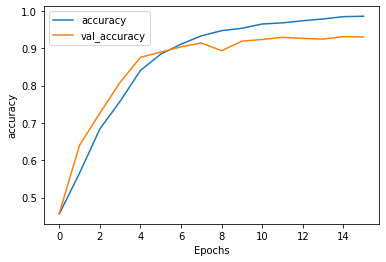

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig('/content/drive/My Drive/Journal/Save_Model/MLP/Accident/accuracy_plot.jpg', bbox_inches='tight', dpi=150)
  plt.show()
  
plot_graphs(acc_history, "accuracy")
# plot_graphs(acc_history, "loss")

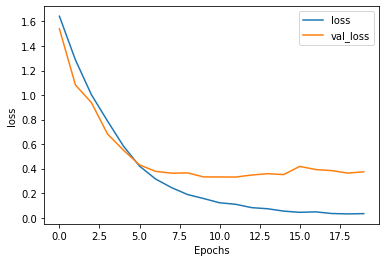

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig('/content/drive/My Drive/Journal/Save_Model/MLP/Accident/loss_plot.jpg', bbox_inches='tight', dpi=150)
  plt.show()
  
# plot_graphs(acc_history, "accuracy")
plot_graphs(acc_history, "loss")

## Crime

In [ ]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 
filepath="/content/drive/My Drive/Journal/Save_Model/MLP/Crime/saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=2)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('/content/drive/My Drive/Journal/Save_Model/MLP/Crime/crime_mlp_my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]
# callbacks_list = [checkpoint, log_csv]

In [ ]:
len(accy_train.value_counts())

9

In [ ]:
crime_model = mlp_model(len(crimey_train.value_counts()))
crime_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3000, 400)         20000000  
                                                                 
 global_average_pooling1d (G  (None, 400)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 450)               180450    
                                                                 
 dropout (Dropout)           (None, 450)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 3157      
                                                                 
Total params: 20,183,607
Trainable params: 20,183,607
Non-trainable params: 0
____________________________________________

In [ ]:
crime_history = crime_model.fit(crimeX_train_pad, crimey_train, epochs=20, validation_data=(crimeX_val_pad, crimey_val), verbose=2, callbacks=callbacks_list)
crime_model.save('/content/drive/My Drive/Journal/Save_Model/MLP/Crime/crime_mlp_model.h5')

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.53414, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Crime/saved_models/weights-improvement-01-0.53.hdf5
351/351 - 8s - loss: 1.5601 - accuracy: 0.4832 - val_loss: 1.4260 - val_accuracy: 0.5341 - 8s/epoch - 24ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.53414 to 0.63936, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Crime/saved_models/weights-improvement-02-0.64.hdf5
351/351 - 7s - loss: 1.1139 - accuracy: 0.5970 - val_loss: 1.0223 - val_accuracy: 0.6394 - 7s/epoch - 21ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.63936 to 0.73414, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Crime/saved_models/weights-improvement-03-0.73.hdf5
351/351 - 17s - loss: 0.8722 - accuracy: 0.6876 - val_loss: 0.8554 - val_accuracy: 0.7341 - 17s/epoch - 49ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.73414 to 0.76787, saving model to /content/drive/My Drive/Journal/

In [ ]:
crime_eval = crime_model.evaluate(crimeX_test_pad, crimey_test, verbose=2)

44/44 - 0s - loss: 0.7783 - accuracy: 0.8577 - 157ms/epoch - 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

prediction = crime_model.predict(crimeX_test_pad)
# print(metrics.classification_report(accy_test, predicted))
crime_y_pred = np.argmax(prediction, axis=-1)
print(classification_report(crimey_test, crime_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       175
           1       0.91      0.83      0.87       126
           2       0.94      0.93      0.94       647
           3       0.55      0.75      0.63       104
           4       0.86      0.83      0.84       127
           5       0.73      0.85      0.78       100
           6       0.89      0.81      0.85       105

    accuracy                           0.86      1384
   macro avg       0.82      0.82      0.81      1384
weighted avg       0.87      0.86      0.86      1384



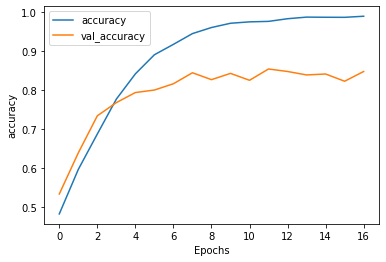

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig('/content/drive/My Drive/Journal/Save_Model/MLP/Accident/accuracy_plot.jpg', bbox_inches='tight', dpi=150)
  plt.show()
  
plot_graphs(crime_history, "accuracy")
# plot_graphs(acc_history, "loss")

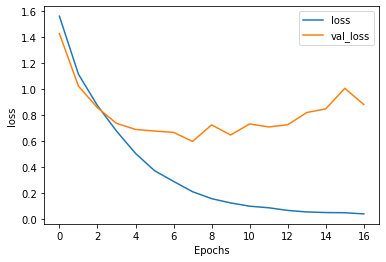

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig('/content/drive/My Drive/Journal/Save_Model/MLP/Crime/loss_plot.jpg', bbox_inches='tight', dpi=150)
  plt.show()
  
# plot_graphs(acc_history, "accuracy")
plot_graphs(crime_history, "loss")

## Entertainment

In [ ]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 
filepath="/content/drive/My Drive/Journal/Save_Model/MLP/Entertainment/saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=2)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('/content/drive/My Drive/Journal/Save_Model/MLP/Entertainment/ent_mlp_my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]
# callbacks_list = [checkpoint, log_csv]

In [ ]:
ent_model = mlp_model(len(enty_train.value_counts()))
ent_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 3000, 400)         20000000  
                                                                 
 global_average_pooling1d_3   (None, 400)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 450)               180450    
                                                                 
 dropout_3 (Dropout)         (None, 450)               0         
                                                                 
 dense_7 (Dense)             (None, 6)                 2706      
                                                                 
Total params: 20,183,156
Trainable params: 20,183,156
Non-trainable params: 0
__________________________________________

In [ ]:
ent_history = ent_model.fit(entX_train_pad, enty_train, epochs=20, validation_data=(entX_val_pad, enty_val), verbose=2, callbacks=callbacks_list)
ent_model.save('/content/drive/My Drive/Journal/Save_Model/MLP/Entertainment/ent_mlp_model.h5')

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.59070, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Entertainment/saved_models/weights-improvement-01-0.59.hdf5
424/424 - 9s - loss: 1.2739 - accuracy: 0.5897 - val_loss: 1.1537 - val_accuracy: 0.5907 - 9s/epoch - 21ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.59070 to 0.66179, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Entertainment/saved_models/weights-improvement-02-0.66.hdf5
424/424 - 19s - loss: 0.9468 - accuracy: 0.6523 - val_loss: 0.9211 - val_accuracy: 0.6618 - 19s/epoch - 44ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.66179 to 0.77542, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Entertainment/saved_models/weights-improvement-03-0.78.hdf5
424/424 - 9s - loss: 0.7757 - accuracy: 0.7250 - val_loss: 0.7513 - val_accuracy: 0.7754 - 9s/epoch - 20ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.77542 to 0.80399, saving model to /content

In [ ]:
new_ent_model = tf.keras.models.load_model('/content/drive/My Drive/Journal/Save_Model/MLP/Entertainment/saved_models/weights-improvement-14-0.85.hdf5')

In [ ]:
ent_eval = new_ent_model.evaluate(entX_test_pad, enty_test, verbose=2)

53/53 - 1s - loss: 0.7724 - accuracy: 0.8428 - 630ms/epoch - 12ms/step


In [ ]:
ent_eval = ent_model.evaluate(entX_test_pad, enty_test, verbose=2)

53/53 - 0s - loss: 0.9302 - accuracy: 0.8326 - 180ms/epoch - 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

prediction = ent_model.predict(entX_test_pad)
# print(metrics.classification_report(accy_test, predicted))
ent_y_pred = np.argmax(prediction, axis=-1)
print(classification_report(enty_test, ent_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       987
           1       0.77      0.67      0.72       204
           2       0.59      0.49      0.53        47
           3       0.72      0.79      0.75       155
           4       0.71      0.75      0.73       213
           5       0.67      0.33      0.44        67

    accuracy                           0.83      1673
   macro avg       0.73      0.66      0.68      1673
weighted avg       0.83      0.83      0.83      1673



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

prediction = new_ent_model.predict(entX_test_pad)
# print(metrics.classification_report(accy_test, predicted))
ent_y_pred = np.argmax(prediction, axis=-1)
print(classification_report(enty_test, ent_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       987
           1       0.72      0.80      0.76       204
           2       0.67      0.55      0.60        47
           3       0.79      0.70      0.74       155
           4       0.86      0.62      0.72       213
           5       0.68      0.58      0.63        67

    accuracy                           0.84      1673
   macro avg       0.77      0.70      0.73      1673
weighted avg       0.84      0.84      0.84      1673



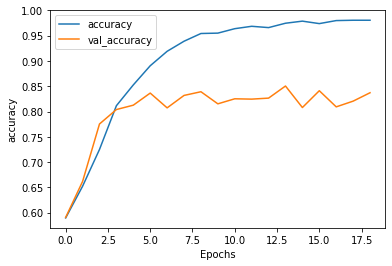

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig('/content/drive/My Drive/Journal/Save_Model/MLP/Entertainment/accuracy_plot.jpg', bbox_inches='tight', dpi=150)
  plt.show()
  
plot_graphs(ent_history, "accuracy")
# plot_graphs(acc_history, "loss")

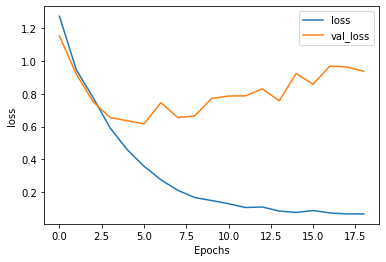

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig('/content/drive/My Drive/Journal/Save_Model/MLP/Entertainment/loss_plot.jpg', bbox_inches='tight', dpi=150)
  plt.show()
  
# plot_graphs(acc_history, "accuracy")
plot_graphs(ent_history, "loss")

## Sports

In [ ]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 
filepath="/content/drive/My Drive/Journal/Save_Model/MLP/Sports/saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=2)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('/content/drive/My Drive/Journal/Save_Model/MLP/Sports/sports_mlp_my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]
# callbacks_list = [checkpoint, log_csv]

In [ ]:
sports_model = mlp_model(len(sportsy_train.value_counts()))
sports_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 3000, 400)         20000000  
                                                                 
 global_average_pooling1d_4   (None, 400)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 450)               180450    
                                                                 
 dropout_4 (Dropout)         (None, 450)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 1804      
                                                                 
Total params: 20,182,254
Trainable params: 20,182,254
Non-trainable params: 0
__________________________________________

In [ ]:
sports_history = sports_model.fit(sportsX_train_pad, sportsy_train, epochs=20, validation_data=(sportsX_val_pad, sportsy_val), verbose=2, callbacks=callbacks_list)
sports_model.save('/content/drive/My Drive/Journal/Save_Model/MLP/Sports/sports_mlp_model.h5')

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.95065, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Sports/saved_models/weights-improvement-01-0.95.hdf5
969/969 - 21s - loss: 0.4197 - accuracy: 0.8473 - val_loss: 0.1559 - val_accuracy: 0.9507 - 21s/epoch - 22ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.95065 to 0.96633, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Sports/saved_models/weights-improvement-02-0.97.hdf5
969/969 - 19s - loss: 0.1416 - accuracy: 0.9536 - val_loss: 0.1095 - val_accuracy: 0.9663 - 19s/epoch - 20ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.96633 to 0.96778, saving model to /content/drive/My Drive/Journal/Save_Model/MLP/Sports/saved_models/weights-improvement-03-0.97.hdf5
969/969 - 20s - loss: 0.0991 - accuracy: 0.9728 - val_loss: 0.1021 - val_accuracy: 0.9678 - 20s/epoch - 21ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.96778 to 0.97591, saving model to /content/drive/My Drive/J

In [ ]:
new_sports_model = tf.keras.models.load_model('/content/drive/My Drive/Journal/Save_Model/MLP/Sports/saved_models/weights-improvement-13-0.98.hdf5')

In [ ]:
sports_eval = new_sports_model.evaluate(sportsX_test_pad, sportsy_test, verbose=2)

120/120 - 1s - loss: 0.1151 - accuracy: 0.9796 - 510ms/epoch - 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

prediction = new_sports_model.predict(sportsX_test_pad)
# print(metrics.classification_report(accy_test, predicted))
sports_y_pred = np.argmax(prediction, axis=-1)
print(classification_report(sportsy_test, sports_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        72
           1       0.99      0.99      0.99      2522
           2       0.97      0.98      0.97      1127
           3       0.91      0.93      0.92       107

    accuracy                           0.98      3828
   macro avg       0.94      0.95      0.94      3828
weighted avg       0.98      0.98      0.98      3828



## CNN

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.optimizers import Adam
from keras.layers import  Dropout, Dense,Embedding, Conv1D, Input, GlobalMaxPooling1D, Flatten
from keras.models import Sequential
def cnn_model():
	# create model
    embedding_dim = 400
    filters = 256
    kernel = 5
    node = 450
    nLayers = 1
    dropout = 0.5
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    # model.add(Input(shape=(embedding_dim,)))
    
    model.add(Conv1D(filters, kernel, activation='relu'))
    model.add(GlobalMaxPooling1D())
    # model.add(Flatten())
    for i in range(0,nLayers):
        model.add(Dense(node, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(c+1, activation='softmax'))
	# Compile model
    opt = Adam(learning_rate=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model = create_model()
model.summary()

In [ ]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 
filepath="/content/drive/My Drive/Journal/Save_Model/CNN/Accident/saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=2)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('/content/drive/My Drive/Journal/Save_Model/CNN/Accident/acc_mlp_my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]
# callbacks_list = [checkpoint, log_csv]

In [ ]:
acc_model = cnn_model(len(accy_train.value_counts()))
acc_model.summary()

In [ ]:
acc_history = acc_model.fit(accX_train_pad, accy_train, epochs=20, validation_data=(accX_val_pad, accy_val), verbose=2, callbacks=callbacks_list)
acc_model.save('/content/drive/My Drive/Journal/Save_Model/CNN/Accident/acc_mlp_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/Journal/Save_Model/CNN/Accident/saved_models/weights-improvement-15-0.93.hdf5')
new_model.evaluate(accX_test_pad, accy_test, verbose=2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

nprediction = new_model.predict(accX_test_pad)
# print(metrics.classification_report(accy_test, predicted))
nacc_y_pred = np.argmax(nprediction, axis=-1)
print(classification_report(accy_test, nacc_y_pred))

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig('/content/drive/My Drive/Journal/Save_Model/CNN/Accident/accuracy_plot.jpg', bbox_inches='tight', dpi=150)
  plt.show()
  
plot_graphs(crime_history, "accuracy")
# plot_graphs(acc_history, "loss")

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig('/content/drive/My Drive/Journal/Save_Model/CNN/Accident/loss_plot.jpg', bbox_inches='tight', dpi=150)
  plt.show()
  
# plot_graphs(acc_history, "accuracy")
plot_graphs(acc_history, "loss")